# Santander Customer Satisfaction

## load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

cust_df = pd.read_csv('./train.csv', encoding='latin-1')
print(f'dataset shape: {cust_df.shape}')
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


## 전처리

In [3]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print(f'unsatisfied 비율은: {(unsatisfied_cnt/total_cnt):.2f}')

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은: 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
# var3 피처값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리, 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print(f'피처 데이터 shape: {X_features.shape}')

피처 데이터 shape: (76020, 369)


## train_test_split

In [7]:
# train, test 비율이 비슷해야 한다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0, stratify=y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()
print(f'학습 세트 Shape: {X_train.shape}, 테스트 세트 Shape: {X_test.shape}')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print(f'\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape: (60816, 369), 테스트 세트 Shape: (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960438
1    0.039562
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


## XGBClassifier(gpu)

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156, tree_method='gpu_hist', predictor='gpu_predictor')

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)], )

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82539	validation_1-auc:0.79429
[1]	validation_0-auc:0.83727	validation_1-auc:0.80417
[2]	validation_0-auc:0.84269	validation_1-auc:0.80721
[3]	validation_0-auc:0.84698	validation_1-auc:0.80959
[4]	validation_0-auc:0.84954	validation_1-auc:0.81311
[5]	validation_0-auc:0.85354	validation_1-auc:0.81550
[6]	validation_0-auc:0.85820	validation_1-auc:0.81885
[7]	validation_0-auc:0.86111	validation_1-auc:0.82033
[8]	validation_0-auc:0.86377	validation_1-auc:0.82176
[9]	validation_0-auc:0.86629	validation_1-auc:0.82173
[10]	validation_0-auc:0.86881	validation_1-auc:0.82231
[11]	validation_0-auc:0.87118	validation_1-auc:0.82339
[12]	validation_0-auc:0.87343	validation_1-auc:0.82415
[13]	validation_0-auc:0.87543	validation_1-auc:0.82441
[14]	validation_0-auc:0.87815	validation_1-auc:0.82533
[15]	validation_0-auc:0.88017	validation_1-auc:0.82550
[16]	validation_0-auc:0.88232	validation_1-auc:0.82661
[17]	validation_0-auc:0.88445	validation_1-auc:0.82719
[18]	validation_0-au

## GridSearchCV XGBClassifier

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# 하이퍼 파라미터 테스트의 속도를 향상시키기 위해 n_estimator를 100으로 감소
xgb_clf = XGBClassifier(n_estimator=500, tree_method='gpu_hist', predictor='gpu_predictor')

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv를 지정하지 않음
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:49:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81628	validation_1-auc:0.78819
[1]	validation_0-auc:0.82128	validation_1-auc:0.79355
[2]	validation_0-auc:0.82037	validation_1-auc:0.78585
[3]	validation_0-auc:0.81803	validation_1-auc:0.78323
[4]	validation_0-auc:0.83478	validation_1-auc:0.80079
[5]	validation_0-auc:0.83143	validation_1-auc:0.79410
[6]	validation_0-auc:0.84067	validation_1-auc:0.80383
[7]	validation_0-auc:0.84435	validation_1-auc:0.80682
[8]	validation_0-auc:0.84260	validation_1-auc:0.80309
[9]	validation_0-auc:0.84398	validation_1-auc:0.80406
[10]	validation_0-auc:0.85167	validation_1-auc:0.81204
[11]	validation_

[0]	validation_0-auc:0.81411	validation_1-auc:0.78969
[1]	validation_0-auc:0.81488	validation_1-auc:0.78761
[2]	validation_0-auc:0.81588	validation_1-auc:0.78300
[3]	validation_0-auc:0.81688	validation_1-auc:0.78166
[4]	validation_0-auc:0.83441	validation_1-auc:0.79909
[5]	validation_0-auc:0.82991	validation_1-auc:0.79312
[6]	validation_0-auc:0.83976	validation_1-auc:0.80229
[7]	validation_0-auc:0.84530	validation_1-auc:0.80757
[8]	validation_0-auc:0.84330	validation_1-auc:0.80371
[9]	validation_0-auc:0.84450	validation_1-auc:0.80514
[10]	validation_0-auc:0.85226	validation_1-auc:0.81213
[11]	validation_0-auc:0.85278	validation_1-auc:0.81107
[12]	validation_0-auc:0.85863	validation_1-auc:0.81681
[13]	validation_0-auc:0.85870	validation_1-auc:0.81599
[14]	validation_0-auc:0.86007	validation_1-auc:0.81470
[15]	validation_0-auc:0.86008	validation_1-auc:0.81197
[16]	validation_0-auc:0.86122	validation_1-auc:0.81074
[17]	validation_0-auc:0.86287	validation_1-auc:0.81183
[18]	validation_0-au

[9]	validation_0-auc:0.84417	validation_1-auc:0.80202
[10]	validation_0-auc:0.85209	validation_1-auc:0.80921
[11]	validation_0-auc:0.85299	validation_1-auc:0.80680
[12]	validation_0-auc:0.85925	validation_1-auc:0.81271
[13]	validation_0-auc:0.85915	validation_1-auc:0.81123
[14]	validation_0-auc:0.85963	validation_1-auc:0.81023
[15]	validation_0-auc:0.85976	validation_1-auc:0.80883
[16]	validation_0-auc:0.86002	validation_1-auc:0.80829
[17]	validation_0-auc:0.86145	validation_1-auc:0.80768
[18]	validation_0-auc:0.86263	validation_1-auc:0.80653
[19]	validation_0-auc:0.86694	validation_1-auc:0.81234
[20]	validation_0-auc:0.86894	validation_1-auc:0.81521
[21]	validation_0-auc:0.87067	validation_1-auc:0.81703
[22]	validation_0-auc:0.87122	validation_1-auc:0.81643
[23]	validation_0-auc:0.87228	validation_1-auc:0.81716
[24]	validation_0-auc:0.87279	validation_1-auc:0.81648
[25]	validation_0-auc:0.87347	validation_1-auc:0.81591
[26]	validation_0-auc:0.87509	validation_1-auc:0.81799
[27]	valida

[23]	validation_0-auc:0.87042	validation_1-auc:0.82206
[24]	validation_0-auc:0.87100	validation_1-auc:0.82162
[25]	validation_0-auc:0.87136	validation_1-auc:0.82142
[26]	validation_0-auc:0.87299	validation_1-auc:0.82311
[27]	validation_0-auc:0.87332	validation_1-auc:0.82268
[28]	validation_0-auc:0.87441	validation_1-auc:0.82325
[29]	validation_0-auc:0.87450	validation_1-auc:0.82317
[30]	validation_0-auc:0.87486	validation_1-auc:0.82325
[31]	validation_0-auc:0.87497	validation_1-auc:0.82295
[32]	validation_0-auc:0.87557	validation_1-auc:0.82391
[33]	validation_0-auc:0.87609	validation_1-auc:0.82423
[34]	validation_0-auc:0.87643	validation_1-auc:0.82432
[35]	validation_0-auc:0.87684	validation_1-auc:0.82415
[36]	validation_0-auc:0.87726	validation_1-auc:0.82410
[37]	validation_0-auc:0.87737	validation_1-auc:0.82390
[38]	validation_0-auc:0.87736	validation_1-auc:0.82366
[39]	validation_0-auc:0.87794	validation_1-auc:0.82307
[40]	validation_0-auc:0.87828	validation_1-auc:0.82299
[41]	valid

[29]	validation_0-auc:0.87417	validation_1-auc:0.82000
[30]	validation_0-auc:0.87489	validation_1-auc:0.81927
[31]	validation_0-auc:0.87518	validation_1-auc:0.81931
[32]	validation_0-auc:0.87556	validation_1-auc:0.82009
[33]	validation_0-auc:0.87708	validation_1-auc:0.82130
[34]	validation_0-auc:0.87739	validation_1-auc:0.82142
[35]	validation_0-auc:0.87785	validation_1-auc:0.82126
[36]	validation_0-auc:0.87807	validation_1-auc:0.82155
[37]	validation_0-auc:0.87803	validation_1-auc:0.82164
[38]	validation_0-auc:0.87818	validation_1-auc:0.82158
[39]	validation_0-auc:0.87846	validation_1-auc:0.82162
[40]	validation_0-auc:0.87857	validation_1-auc:0.82159
[41]	validation_0-auc:0.87900	validation_1-auc:0.82193
[42]	validation_0-auc:0.87910	validation_1-auc:0.82210
[43]	validation_0-auc:0.87964	validation_1-auc:0.82256
[44]	validation_0-auc:0.88025	validation_1-auc:0.82171
[45]	validation_0-auc:0.88038	validation_1-auc:0.82170
[46]	validation_0-auc:0.88053	validation_1-auc:0.82141
[47]	valid

[32]	validation_0-auc:0.90382	validation_1-auc:0.82030
[33]	validation_0-auc:0.90451	validation_1-auc:0.82100
[34]	validation_0-auc:0.90482	validation_1-auc:0.82057
[35]	validation_0-auc:0.90606	validation_1-auc:0.82175
[36]	validation_0-auc:0.90626	validation_1-auc:0.82164
[37]	validation_0-auc:0.90642	validation_1-auc:0.82136
[38]	validation_0-auc:0.90688	validation_1-auc:0.82224
[39]	validation_0-auc:0.90799	validation_1-auc:0.82287
[40]	validation_0-auc:0.90866	validation_1-auc:0.82208
[41]	validation_0-auc:0.90916	validation_1-auc:0.82214
[42]	validation_0-auc:0.90949	validation_1-auc:0.82158
[43]	validation_0-auc:0.91079	validation_1-auc:0.82201
[44]	validation_0-auc:0.91084	validation_1-auc:0.82146
[45]	validation_0-auc:0.91091	validation_1-auc:0.82130
[46]	validation_0-auc:0.91100	validation_1-auc:0.82062
[47]	validation_0-auc:0.91142	validation_1-auc:0.82143
[48]	validation_0-auc:0.91154	validation_1-auc:0.82103
[49]	validation_0-auc:0.91162	validation_1-auc:0.82096
[50]	valid

[48]	validation_0-auc:0.91321	validation_1-auc:0.80974
[49]	validation_0-auc:0.91421	validation_1-auc:0.80936
[50]	validation_0-auc:0.91538	validation_1-auc:0.80812
[17:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82564	validation_1-auc:0.80153
[1]	validation_0-auc:0.82981	validation_1-auc:0.79502
[2]	validation_0-auc:0.82981	validation_1-auc:0.79082
[3]	validation_0-auc:0.82716	validation_1-auc:0.78613
[4]	validation_0-auc:0.84792	validation_1-auc:0.80151
[5]	validation_0-auc:0.84609	validation_1-auc:0.79685
[6]	validation_0-auc:0.85533	validation_1-auc:0.80254
[7]	validation_0-auc:0.86096	validation_1-auc:0.80859
[8]	validation

[11]	validation_0-auc:0.86766	validation_1-auc:0.81203
[12]	validation_0-auc:0.87366	validation_1-auc:0.81778
[13]	validation_0-auc:0.87267	validation_1-auc:0.81684
[14]	validation_0-auc:0.87345	validation_1-auc:0.81592
[15]	validation_0-auc:0.87348	validation_1-auc:0.81395
[16]	validation_0-auc:0.87428	validation_1-auc:0.81358
[17]	validation_0-auc:0.87649	validation_1-auc:0.81239
[18]	validation_0-auc:0.87750	validation_1-auc:0.81117
[19]	validation_0-auc:0.88242	validation_1-auc:0.81438
[20]	validation_0-auc:0.88545	validation_1-auc:0.81808
[21]	validation_0-auc:0.88726	validation_1-auc:0.81978
[22]	validation_0-auc:0.88738	validation_1-auc:0.81945
[23]	validation_0-auc:0.88762	validation_1-auc:0.81933
[24]	validation_0-auc:0.88796	validation_1-auc:0.81898
[25]	validation_0-auc:0.88885	validation_1-auc:0.81852
[26]	validation_0-auc:0.89032	validation_1-auc:0.81908
[27]	validation_0-auc:0.89041	validation_1-auc:0.81885
[28]	validation_0-auc:0.89145	validation_1-auc:0.82026
[29]	valid

[28]	validation_0-auc:0.89201	validation_1-auc:0.81550
[29]	validation_0-auc:0.89219	validation_1-auc:0.81533
[30]	validation_0-auc:0.89260	validation_1-auc:0.81545
[31]	validation_0-auc:0.89301	validation_1-auc:0.81556
[32]	validation_0-auc:0.89357	validation_1-auc:0.81571
[33]	validation_0-auc:0.89410	validation_1-auc:0.81690
[34]	validation_0-auc:0.89443	validation_1-auc:0.81682
[35]	validation_0-auc:0.89531	validation_1-auc:0.81720
[36]	validation_0-auc:0.89579	validation_1-auc:0.81758
[37]	validation_0-auc:0.89645	validation_1-auc:0.81606
[38]	validation_0-auc:0.89678	validation_1-auc:0.81541
[39]	validation_0-auc:0.89739	validation_1-auc:0.81530
[40]	validation_0-auc:0.89777	validation_1-auc:0.81424
[41]	validation_0-auc:0.89804	validation_1-auc:0.81450
[42]	validation_0-auc:0.89809	validation_1-auc:0.81392
[43]	validation_0-auc:0.89808	validation_1-auc:0.81391
[44]	validation_0-auc:0.89827	validation_1-auc:0.81367
[45]	validation_0-auc:0.89928	validation_1-auc:0.81319
[46]	valid

[38]	validation_0-auc:0.89856	validation_1-auc:0.81226
[39]	validation_0-auc:0.89917	validation_1-auc:0.81232
[40]	validation_0-auc:0.89962	validation_1-auc:0.81227
[41]	validation_0-auc:0.90036	validation_1-auc:0.81182
[42]	validation_0-auc:0.90048	validation_1-auc:0.81173
[43]	validation_0-auc:0.90085	validation_1-auc:0.81171
[44]	validation_0-auc:0.90101	validation_1-auc:0.81184
[45]	validation_0-auc:0.90117	validation_1-auc:0.81181
[46]	validation_0-auc:0.90159	validation_1-auc:0.81124
[47]	validation_0-auc:0.90212	validation_1-auc:0.81002
[48]	validation_0-auc:0.90241	validation_1-auc:0.80985
[49]	validation_0-auc:0.90269	validation_1-auc:0.80978
[50]	validation_0-auc:0.90333	validation_1-auc:0.80883
[51]	validation_0-auc:0.90348	validation_1-auc:0.80877
[17:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bind

[2]	validation_0-auc:0.81883	validation_1-auc:0.78052
[3]	validation_0-auc:0.81913	validation_1-auc:0.77668
[4]	validation_0-auc:0.83348	validation_1-auc:0.79345
[5]	validation_0-auc:0.83260	validation_1-auc:0.79066
[6]	validation_0-auc:0.84130	validation_1-auc:0.80112
[7]	validation_0-auc:0.84785	validation_1-auc:0.80819
[8]	validation_0-auc:0.85179	validation_1-auc:0.81259
[9]	validation_0-auc:0.85366	validation_1-auc:0.81141
[10]	validation_0-auc:0.85901	validation_1-auc:0.81596
[11]	validation_0-auc:0.85973	validation_1-auc:0.81463
[12]	validation_0-auc:0.86286	validation_1-auc:0.81751
[13]	validation_0-auc:0.86382	validation_1-auc:0.81616
[14]	validation_0-auc:0.86406	validation_1-auc:0.81410
[15]	validation_0-auc:0.86665	validation_1-auc:0.81808
[16]	validation_0-auc:0.86794	validation_1-auc:0.81817
[17]	validation_0-auc:0.86977	validation_1-auc:0.82039
[18]	validation_0-auc:0.87035	validation_1-auc:0.82027
[19]	validation_0-auc:0.87163	validation_1-auc:0.82070
[20]	validation_0-

[30]	validation_0-auc:0.88033	validation_1-auc:0.81979
[31]	validation_0-auc:0.88065	validation_1-auc:0.81943
[32]	validation_0-auc:0.88075	validation_1-auc:0.81908
[33]	validation_0-auc:0.88183	validation_1-auc:0.81936
[34]	validation_0-auc:0.88203	validation_1-auc:0.81891
[35]	validation_0-auc:0.88220	validation_1-auc:0.81883
[36]	validation_0-auc:0.88267	validation_1-auc:0.81944
[37]	validation_0-auc:0.88345	validation_1-auc:0.81913
[38]	validation_0-auc:0.88428	validation_1-auc:0.81846
[39]	validation_0-auc:0.88505	validation_1-auc:0.81826
[40]	validation_0-auc:0.88544	validation_1-auc:0.81796
[41]	validation_0-auc:0.88562	validation_1-auc:0.81756
[42]	validation_0-auc:0.88649	validation_1-auc:0.81714
[43]	validation_0-auc:0.88674	validation_1-auc:0.81727
[44]	validation_0-auc:0.88752	validation_1-auc:0.81744
[45]	validation_0-auc:0.88800	validation_1-auc:0.81688
[46]	validation_0-auc:0.88858	validation_1-auc:0.81616
[47]	validation_0-auc:0.88887	validation_1-auc:0.81602
[48]	valid

[54]	validation_0-auc:0.88874	validation_1-auc:0.82125
[17:51:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81897	validation_1-auc:0.78689
[1]	validation_0-auc:0.82377	validation_1-auc:0.79015
[2]	validation_0-auc:0.81860	validation_1-auc:0.78130
[3]	validation_0-auc:0.81966	validation_1-auc:0.77833
[4]	validation_0-auc:0.83349	validation_1-auc:0.79535
[5]	validation_0-auc:0.83065	validation_1-auc:0.79096
[6]	validation_0-auc:0.83959	validation_1-auc:0.80083
[7]	validation_0-auc:0.84707	validation_1-auc:0.80969
[8]	validation_0-auc:0.85154	validation_1-auc:0.81497
[9]	validation_0-auc:0.85207	validation_1-auc:0.81353
[10]	validation_

[15]	validation_0-auc:0.86377	validation_1-auc:0.81960
[16]	validation_0-auc:0.86506	validation_1-auc:0.81669
[17]	validation_0-auc:0.86687	validation_1-auc:0.81957
[18]	validation_0-auc:0.86742	validation_1-auc:0.81926
[19]	validation_0-auc:0.86877	validation_1-auc:0.82099
[20]	validation_0-auc:0.86910	validation_1-auc:0.82127
[21]	validation_0-auc:0.86982	validation_1-auc:0.82202
[22]	validation_0-auc:0.87018	validation_1-auc:0.82226
[23]	validation_0-auc:0.87104	validation_1-auc:0.82262
[24]	validation_0-auc:0.87185	validation_1-auc:0.82162
[25]	validation_0-auc:0.87308	validation_1-auc:0.82207
[26]	validation_0-auc:0.87357	validation_1-auc:0.82149
[27]	validation_0-auc:0.87442	validation_1-auc:0.82214
[28]	validation_0-auc:0.87521	validation_1-auc:0.82186
[29]	validation_0-auc:0.87548	validation_1-auc:0.82148
[30]	validation_0-auc:0.87594	validation_1-auc:0.82141
[31]	validation_0-auc:0.87608	validation_1-auc:0.82088
[32]	validation_0-auc:0.87647	validation_1-auc:0.82064
[33]	valid

[46]	validation_0-auc:0.91484	validation_1-auc:0.81653
[47]	validation_0-auc:0.91516	validation_1-auc:0.81556
[48]	validation_0-auc:0.91545	validation_1-auc:0.81500
[49]	validation_0-auc:0.91569	validation_1-auc:0.81508
[50]	validation_0-auc:0.91604	validation_1-auc:0.81510
[51]	validation_0-auc:0.91661	validation_1-auc:0.81554
[52]	validation_0-auc:0.91730	validation_1-auc:0.81518
[53]	validation_0-auc:0.91736	validation_1-auc:0.81513
[54]	validation_0-auc:0.91767	validation_1-auc:0.81470
[55]	validation_0-auc:0.91814	validation_1-auc:0.81394
[56]	validation_0-auc:0.91912	validation_1-auc:0.81355
[57]	validation_0-auc:0.91930	validation_1-auc:0.81367
[17:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification.

[8]	validation_0-auc:0.86503	validation_1-auc:0.81420
[9]	validation_0-auc:0.86889	validation_1-auc:0.80952
[10]	validation_0-auc:0.87503	validation_1-auc:0.81372
[11]	validation_0-auc:0.87634	validation_1-auc:0.81173
[12]	validation_0-auc:0.87988	validation_1-auc:0.81666
[13]	validation_0-auc:0.88162	validation_1-auc:0.81712
[14]	validation_0-auc:0.88302	validation_1-auc:0.81422
[15]	validation_0-auc:0.88698	validation_1-auc:0.81785
[16]	validation_0-auc:0.88751	validation_1-auc:0.81508
[17]	validation_0-auc:0.88947	validation_1-auc:0.81837
[18]	validation_0-auc:0.89024	validation_1-auc:0.81685
[19]	validation_0-auc:0.89281	validation_1-auc:0.81891
[20]	validation_0-auc:0.89366	validation_1-auc:0.81987
[21]	validation_0-auc:0.89463	validation_1-auc:0.82032
[22]	validation_0-auc:0.89485	validation_1-auc:0.82025
[23]	validation_0-auc:0.89538	validation_1-auc:0.82140
[24]	validation_0-auc:0.89663	validation_1-auc:0.82076
[25]	validation_0-auc:0.89839	validation_1-auc:0.82067
[26]	validat

[37]	validation_0-auc:0.90038	validation_1-auc:0.81835
[38]	validation_0-auc:0.90137	validation_1-auc:0.81774
[39]	validation_0-auc:0.90202	validation_1-auc:0.81773
[40]	validation_0-auc:0.90239	validation_1-auc:0.81718
[41]	validation_0-auc:0.90281	validation_1-auc:0.81690
[42]	validation_0-auc:0.90285	validation_1-auc:0.81661
[43]	validation_0-auc:0.90296	validation_1-auc:0.81686
[44]	validation_0-auc:0.90333	validation_1-auc:0.81671
[45]	validation_0-auc:0.90488	validation_1-auc:0.81682
[46]	validation_0-auc:0.90575	validation_1-auc:0.81691
[47]	validation_0-auc:0.90607	validation_1-auc:0.81604
[48]	validation_0-auc:0.90614	validation_1-auc:0.81599
[49]	validation_0-auc:0.90640	validation_1-auc:0.81565
[50]	validation_0-auc:0.90667	validation_1-auc:0.81557
[51]	validation_0-auc:0.90696	validation_1-auc:0.81529
[52]	validation_0-auc:0.90741	validation_1-auc:0.81502
[53]	validation_0-auc:0.90788	validation_1-auc:0.81475
[54]	validation_0-auc:0.90880	validation_1-auc:0.81401
[55]	valid

[1]	validation_0-auc:0.83109	validation_1-auc:0.79654
[2]	validation_0-auc:0.83036	validation_1-auc:0.79219
[3]	validation_0-auc:0.83108	validation_1-auc:0.78388
[4]	validation_0-auc:0.84684	validation_1-auc:0.80046
[5]	validation_0-auc:0.84552	validation_1-auc:0.79555
[6]	validation_0-auc:0.85423	validation_1-auc:0.80639
[7]	validation_0-auc:0.86031	validation_1-auc:0.81227
[8]	validation_0-auc:0.86523	validation_1-auc:0.81805
[9]	validation_0-auc:0.86633	validation_1-auc:0.81553
[10]	validation_0-auc:0.87166	validation_1-auc:0.81924
[11]	validation_0-auc:0.87276	validation_1-auc:0.81586
[12]	validation_0-auc:0.87567	validation_1-auc:0.82017
[13]	validation_0-auc:0.87702	validation_1-auc:0.81759
[14]	validation_0-auc:0.87772	validation_1-auc:0.81591
[15]	validation_0-auc:0.88140	validation_1-auc:0.81895
[16]	validation_0-auc:0.88319	validation_1-auc:0.81681
[17]	validation_0-auc:0.88491	validation_1-auc:0.81870
[18]	validation_0-auc:0.88521	validation_1-auc:0.81814
[19]	validation_0-a

In [10]:
# n_estimators는  000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rante=0.02,\
                        max_depth=5, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, tree_method='gpu_hist', predictor='gpu_predictor')

# evaluation metric을 auc로, early stopping은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:51:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rante } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.73559	validation_1-auc:0.70538
[1]	validation_0-auc:0.75625	validation_1-auc:0.71672
[2]	validation_0-auc:0.82663	validation_1-auc:0.78815
[3]	validation_0-auc:0.83842	validation_1-auc:0.80233
[4]	validation_0-auc:0.84561	validation_1-auc:0.80783
[5]	validation_0-auc:0.84837	validation_1-auc:0.81103
[6]	validation_0-auc:0.84938	validation_1-auc:0.80959
[7]	validation_0-auc:0.85455	validation_1-auc:0.81447
[8]	validation_0-auc:0.85693	validation_1-auc:0.81837
[9]	validation_0-auc:0.85804	validation_1-auc:0.81964
[10]	validation_0-auc:0.85977	validation_1-auc:0.81818
[11]	validati

[142]	validation_0-auc:0.92717	validation_1-auc:0.80903
[143]	validation_0-auc:0.92732	validation_1-auc:0.80843
[144]	validation_0-auc:0.92782	validation_1-auc:0.80857
[145]	validation_0-auc:0.92797	validation_1-auc:0.80811
[146]	validation_0-auc:0.92814	validation_1-auc:0.80797
[147]	validation_0-auc:0.92844	validation_1-auc:0.80773
[148]	validation_0-auc:0.92882	validation_1-auc:0.80683
[149]	validation_0-auc:0.92892	validation_1-auc:0.80667
[150]	validation_0-auc:0.92944	validation_1-auc:0.80641
[151]	validation_0-auc:0.93002	validation_1-auc:0.80590
[152]	validation_0-auc:0.93003	validation_1-auc:0.80593
[153]	validation_0-auc:0.93036	validation_1-auc:0.80630
[154]	validation_0-auc:0.93066	validation_1-auc:0.80591
[155]	validation_0-auc:0.93071	validation_1-auc:0.80600
[156]	validation_0-auc:0.93099	validation_1-auc:0.80585
[157]	validation_0-auc:0.93153	validation_1-auc:0.80559
[158]	validation_0-auc:0.93198	validation_1-auc:0.80572
[159]	validation_0-auc:0.93245	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

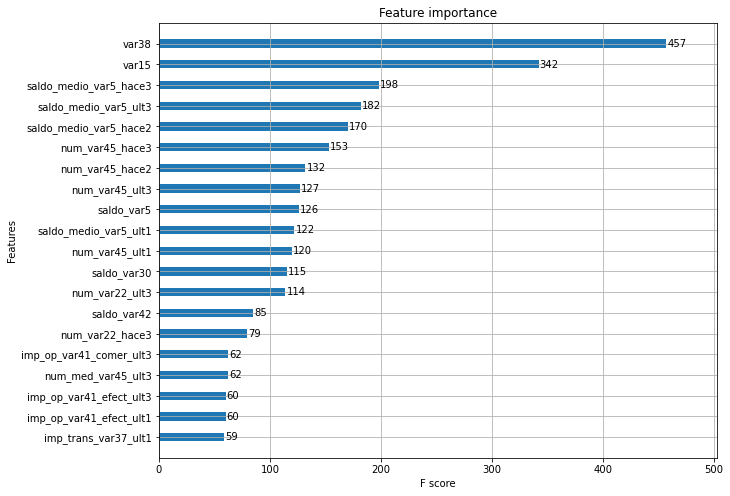

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

# LightGBM

## lightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [12]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)#, tree_method='gpu_hist', predictor='gpu_predictor')

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')

[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.801789	valid_0's binary_logloss: 0.155038
[3]	valid_0's auc: 0.803367	valid_0's binary_logloss: 0.15185
[4]	valid_0's auc: 0.805168	valid_0's binary_logloss: 0.14961
[5]	valid_0's auc: 0.809401	valid_0's binary_logloss: 0.147695
[6]	valid_0's auc: 0.810671	valid_0's binary_logloss: 0.146234
[7]	valid_0's auc: 0.815356	valid_0's binary_logloss: 0.144877
[8]	valid_0's auc: 0.816777	valid_0's binary_logloss: 0.143783
[9]	valid_0's auc: 0.817821	valid_0's binary_logloss: 0.143084
[10]	valid_0's auc: 0.818637	valid_0's binary_logloss: 0.142272
[11]	valid_0's auc: 0.81939	valid_0's binary_logloss: 0.141623
[12]	valid_0's auc: 0.821106	valid_0's binary_logloss: 0.141043
[13]	valid_0's auc: 0.822008	valid_0's binary_logloss: 0.140628
[14]	valid_0's auc: 0.822584	valid_0's binary_logloss: 0.140198
[15]	valid_0's auc: 0.822291	valid_0's binary_logloss:

ROC AUC: 0.8239


In [14]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=500, tree_method='gpu_hist', predictor='gpu_predictor')

params = {'num_leaves':[32, 64], 'max_depth':[128, 160], 'min_child_samples':[60, 100], 'subsample':[0.8, 1]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv를 지정하지 않음
gridcv = GridSearchCV(LGBM_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print(f'GridSearchCV 최적 파라미터: {gridcv.best_params_}')
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1075: UserWarning: predictor keyword has been found in `params` and will be ignored.
Please use predictor argument of the Dataset constructor to pass this parameter.
  warnings.warn('{0} keyword has been found in `params` and will be ignored.\n'


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978

[22]	valid_0's auc: 0.872675	valid_0's binary_logloss: 0.126541	valid_1's auc: 0.819219	valid_1's binary_logloss: 0.138838
[23]	valid_0's auc: 0.873665	valid_0's binary_logloss: 0.126146	valid_1's auc: 0.819534	valid_1's binary_logloss: 0.138747
[24]	valid_0's auc: 0.874993	valid_0's binary_logloss: 0.125738	valid_1's auc: 0.819578	valid_1's binary_logloss: 0.138675
[25]	valid_0's auc: 0.875826	valid_0's binary_logloss: 0.125343	valid_1's auc: 0.819536	valid_1's binary_logloss: 0.138664
[26]	valid_0's auc: 0.877015	valid_0's binary_logloss: 0.124974	valid_1's auc: 0.819669	valid_1's binary_logloss: 0.138645
[27]	valid_0's auc: 0.877807	valid_0's binary_logloss: 0.124643	valid_1's auc: 0.819853	valid_1's binary_logloss: 0.138582
[28]	valid_0's auc: 0.879044	valid_0's binary_logloss: 0.124301	valid_1's auc: 0.819253	valid_1's binary_logloss: 0.138612
[29]	valid_0's auc: 0.879763	valid_0's binary_logloss: 0.123961	valid_1's auc: 0.819209	valid_1's binary_logloss: 0.138633
[30]	valid_0's a

[44]	valid_0's auc: 0.889732	valid_0's binary_logloss: 0.120062	valid_1's auc: 0.825148	valid_1's binary_logloss: 0.137685
[45]	valid_0's auc: 0.890409	valid_0's binary_logloss: 0.119829	valid_1's auc: 0.824777	valid_1's binary_logloss: 0.137746
[46]	valid_0's auc: 0.890883	valid_0's binary_logloss: 0.119602	valid_1's auc: 0.824571	valid_1's binary_logloss: 0.137786
[47]	valid_0's auc: 0.891795	valid_0's binary_logloss: 0.119294	valid_1's auc: 0.824887	valid_1's binary_logloss: 0.13776
[48]	valid_0's auc: 0.892515	valid_0's binary_logloss: 0.119061	valid_1's auc: 0.824715	valid_1's binary_logloss: 0.137784
[49]	valid_0's auc: 0.892888	valid_0's binary_logloss: 0.118865	valid_1's auc: 0.824516	valid_1's binary_logloss: 0.137879
[50]	valid_0's auc: 0.893437	valid_0's binary_logloss: 0.118671	valid_1's auc: 0.824444	valid_1's binary_logloss: 0.137892
[51]	valid_0's auc: 0.894248	valid_0's binary_logloss: 0.118459	valid_1's auc: 0.824373	valid_1's binary_logloss: 0.137909
[52]	valid_0's au

[54]	valid_0's auc: 0.895071	valid_0's binary_logloss: 0.117999	valid_1's auc: 0.820626	valid_1's binary_logloss: 0.138616
[55]	valid_0's auc: 0.89553	valid_0's binary_logloss: 0.11779	valid_1's auc: 0.820568	valid_1's binary_logloss: 0.138651
[56]	valid_0's auc: 0.895915	valid_0's binary_logloss: 0.117588	valid_1's auc: 0.820177	valid_1's binary_logloss: 0.13872
[57]	valid_0's auc: 0.896231	valid_0's binary_logloss: 0.117369	valid_1's auc: 0.820107	valid_1's binary_logloss: 0.138758
[58]	valid_0's auc: 0.896571	valid_0's binary_logloss: 0.117157	valid_1's auc: 0.820469	valid_1's binary_logloss: 0.138727
[59]	valid_0's auc: 0.897178	valid_0's binary_logloss: 0.116996	valid_1's auc: 0.820552	valid_1's binary_logloss: 0.138722
Early stopping, best iteration is:
[29]	valid_0's auc: 0.878276	valid_0's binary_logloss: 0.124149	valid_1's auc: 0.823991	valid_1's binary_logloss: 0.138003
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	v

[23]	valid_0's auc: 0.872836	valid_0's binary_logloss: 0.126058	valid_1's auc: 0.822753	valid_1's binary_logloss: 0.138956
[24]	valid_0's auc: 0.873748	valid_0's binary_logloss: 0.125663	valid_1's auc: 0.822431	valid_1's binary_logloss: 0.138906
[25]	valid_0's auc: 0.874847	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.822752	valid_1's binary_logloss: 0.138812
[26]	valid_0's auc: 0.875578	valid_0's binary_logloss: 0.124928	valid_1's auc: 0.822986	valid_1's binary_logloss: 0.138787
[27]	valid_0's auc: 0.876843	valid_0's binary_logloss: 0.124531	valid_1's auc: 0.822313	valid_1's binary_logloss: 0.138769
[28]	valid_0's auc: 0.877942	valid_0's binary_logloss: 0.124184	valid_1's auc: 0.822829	valid_1's binary_logloss: 0.138626
[29]	valid_0's auc: 0.878974	valid_0's binary_logloss: 0.123855	valid_1's auc: 0.823097	valid_1's binary_logloss: 0.138562
[30]	valid_0's auc: 0.879727	valid_0's binary_logloss: 0.123534	valid_1's auc: 0.823072	valid_1's binary_logloss: 0.138526
[31]	valid_0's au

[27]	valid_0's auc: 0.877807	valid_0's binary_logloss: 0.124643	valid_1's auc: 0.819853	valid_1's binary_logloss: 0.138582
[28]	valid_0's auc: 0.879044	valid_0's binary_logloss: 0.124301	valid_1's auc: 0.819253	valid_1's binary_logloss: 0.138612
[29]	valid_0's auc: 0.879763	valid_0's binary_logloss: 0.123961	valid_1's auc: 0.819209	valid_1's binary_logloss: 0.138633
[30]	valid_0's auc: 0.88068	valid_0's binary_logloss: 0.123627	valid_1's auc: 0.819341	valid_1's binary_logloss: 0.138621
[31]	valid_0's auc: 0.881508	valid_0's binary_logloss: 0.123344	valid_1's auc: 0.819567	valid_1's binary_logloss: 0.138615
[32]	valid_0's auc: 0.882314	valid_0's binary_logloss: 0.123014	valid_1's auc: 0.81943	valid_1's binary_logloss: 0.138617
[33]	valid_0's auc: 0.883022	valid_0's binary_logloss: 0.122701	valid_1's auc: 0.819226	valid_1's binary_logloss: 0.138658
[34]	valid_0's auc: 0.883714	valid_0's binary_logloss: 0.122437	valid_1's auc: 0.818715	valid_1's binary_logloss: 0.138741
[35]	valid_0's auc

[54]	valid_0's auc: 0.895335	valid_0's binary_logloss: 0.117946	valid_1's auc: 0.824599	valid_1's binary_logloss: 0.137872
[55]	valid_0's auc: 0.895681	valid_0's binary_logloss: 0.117784	valid_1's auc: 0.824523	valid_1's binary_logloss: 0.137891
[56]	valid_0's auc: 0.896394	valid_0's binary_logloss: 0.117614	valid_1's auc: 0.824805	valid_1's binary_logloss: 0.137845
[57]	valid_0's auc: 0.89677	valid_0's binary_logloss: 0.11748	valid_1's auc: 0.824745	valid_1's binary_logloss: 0.137867
[58]	valid_0's auc: 0.897215	valid_0's binary_logloss: 0.117267	valid_1's auc: 0.824651	valid_1's binary_logloss: 0.137868
[59]	valid_0's auc: 0.897495	valid_0's binary_logloss: 0.117098	valid_1's auc: 0.824442	valid_1's binary_logloss: 0.137904
[60]	valid_0's auc: 0.897939	valid_0's binary_logloss: 0.116923	valid_1's auc: 0.824086	valid_1's binary_logloss: 0.137951
[61]	valid_0's auc: 0.898377	valid_0's binary_logloss: 0.116745	valid_1's auc: 0.823607	valid_1's binary_logloss: 0.138047
[62]	valid_0's auc

[53]	valid_0's auc: 0.894621	valid_0's binary_logloss: 0.118193	valid_1's auc: 0.820728	valid_1's binary_logloss: 0.138575
[54]	valid_0's auc: 0.895071	valid_0's binary_logloss: 0.117999	valid_1's auc: 0.820626	valid_1's binary_logloss: 0.138616
[55]	valid_0's auc: 0.89553	valid_0's binary_logloss: 0.11779	valid_1's auc: 0.820568	valid_1's binary_logloss: 0.138651
[56]	valid_0's auc: 0.895915	valid_0's binary_logloss: 0.117588	valid_1's auc: 0.820177	valid_1's binary_logloss: 0.13872
[57]	valid_0's auc: 0.896231	valid_0's binary_logloss: 0.117369	valid_1's auc: 0.820107	valid_1's binary_logloss: 0.138758
[58]	valid_0's auc: 0.896571	valid_0's binary_logloss: 0.117157	valid_1's auc: 0.820469	valid_1's binary_logloss: 0.138727
[59]	valid_0's auc: 0.897178	valid_0's binary_logloss: 0.116996	valid_1's auc: 0.820552	valid_1's binary_logloss: 0.138722
Early stopping, best iteration is:
[29]	valid_0's auc: 0.878276	valid_0's binary_logloss: 0.124149	valid_1's auc: 0.823991	valid_1's binary_lo

[20]	valid_0's auc: 0.887083	valid_0's binary_logloss: 0.122272	valid_1's auc: 0.823533	valid_1's binary_logloss: 0.138678
[21]	valid_0's auc: 0.888464	valid_0's binary_logloss: 0.121651	valid_1's auc: 0.824253	valid_1's binary_logloss: 0.138511
[22]	valid_0's auc: 0.889693	valid_0's binary_logloss: 0.121046	valid_1's auc: 0.824144	valid_1's binary_logloss: 0.138447
[23]	valid_0's auc: 0.891304	valid_0's binary_logloss: 0.120448	valid_1's auc: 0.824954	valid_1's binary_logloss: 0.138285
[24]	valid_0's auc: 0.892273	valid_0's binary_logloss: 0.119939	valid_1's auc: 0.824839	valid_1's binary_logloss: 0.138248
[25]	valid_0's auc: 0.89312	valid_0's binary_logloss: 0.119417	valid_1's auc: 0.82481	valid_1's binary_logloss: 0.138232
[26]	valid_0's auc: 0.894455	valid_0's binary_logloss: 0.118868	valid_1's auc: 0.824649	valid_1's binary_logloss: 0.138212
[27]	valid_0's auc: 0.895822	valid_0's binary_logloss: 0.118346	valid_1's auc: 0.824744	valid_1's binary_logloss: 0.138218
[28]	valid_0's auc

[39]	valid_0's auc: 0.908811	valid_0's binary_logloss: 0.113041	valid_1's auc: 0.821795	valid_1's binary_logloss: 0.138887
[40]	valid_0's auc: 0.909615	valid_0's binary_logloss: 0.112633	valid_1's auc: 0.821615	valid_1's binary_logloss: 0.138956
[41]	valid_0's auc: 0.910148	valid_0's binary_logloss: 0.11232	valid_1's auc: 0.821387	valid_1's binary_logloss: 0.139018
[42]	valid_0's auc: 0.911051	valid_0's binary_logloss: 0.111959	valid_1's auc: 0.821582	valid_1's binary_logloss: 0.139067
[43]	valid_0's auc: 0.911978	valid_0's binary_logloss: 0.111595	valid_1's auc: 0.821517	valid_1's binary_logloss: 0.139108
[44]	valid_0's auc: 0.913084	valid_0's binary_logloss: 0.111275	valid_1's auc: 0.821636	valid_1's binary_logloss: 0.139103
[45]	valid_0's auc: 0.913548	valid_0's binary_logloss: 0.110952	valid_1's auc: 0.821352	valid_1's binary_logloss: 0.139241
[46]	valid_0's auc: 0.914324	valid_0's binary_logloss: 0.110581	valid_1's auc: 0.8207	valid_1's binary_logloss: 0.139419
[47]	valid_0's auc:

[56]	valid_0's auc: 0.918044	valid_0's binary_logloss: 0.108035	valid_1's auc: 0.82273	valid_1's binary_logloss: 0.138736
[57]	valid_0's auc: 0.918423	valid_0's binary_logloss: 0.107755	valid_1's auc: 0.822501	valid_1's binary_logloss: 0.138788
[58]	valid_0's auc: 0.91885	valid_0's binary_logloss: 0.107496	valid_1's auc: 0.822488	valid_1's binary_logloss: 0.13885
[59]	valid_0's auc: 0.919116	valid_0's binary_logloss: 0.107249	valid_1's auc: 0.82227	valid_1's binary_logloss: 0.138885
[60]	valid_0's auc: 0.919608	valid_0's binary_logloss: 0.106961	valid_1's auc: 0.822284	valid_1's binary_logloss: 0.138915
Early stopping, best iteration is:
[30]	valid_0's auc: 0.899317	valid_0's binary_logloss: 0.116883	valid_1's auc: 0.826208	valid_1's binary_logloss: 0.137215
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
Training

[20]	valid_0's auc: 0.887975	valid_0's binary_logloss: 0.122156	valid_1's auc: 0.819985	valid_1's binary_logloss: 0.139138
[21]	valid_0's auc: 0.889396	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.819777	valid_1's binary_logloss: 0.139096
[22]	valid_0's auc: 0.890658	valid_0's binary_logloss: 0.120954	valid_1's auc: 0.820179	valid_1's binary_logloss: 0.139047
[23]	valid_0's auc: 0.891874	valid_0's binary_logloss: 0.120374	valid_1's auc: 0.820354	valid_1's binary_logloss: 0.138923
[24]	valid_0's auc: 0.893434	valid_0's binary_logloss: 0.119791	valid_1's auc: 0.821222	valid_1's binary_logloss: 0.138686
[25]	valid_0's auc: 0.894302	valid_0's binary_logloss: 0.119258	valid_1's auc: 0.820686	valid_1's binary_logloss: 0.138792
[26]	valid_0's auc: 0.895764	valid_0's binary_logloss: 0.118722	valid_1's auc: 0.821785	valid_1's binary_logloss: 0.138652
[27]	valid_0's auc: 0.897049	valid_0's binary_logloss: 0.118199	valid_1's auc: 0.821255	valid_1's binary_logloss: 0.138766
[28]	valid_0's a

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866743	valid_0's binary_logloss: 0.135504	valid_1's auc: 0.820643	valid_1's binary_loglos

[19]	valid_0's auc: 0.887301	valid_0's binary_logloss: 0.122801	valid_1's auc: 0.825576	valid_1's binary_logloss: 0.137784
[20]	valid_0's auc: 0.888258	valid_0's binary_logloss: 0.122192	valid_1's auc: 0.824882	valid_1's binary_logloss: 0.137758
[21]	valid_0's auc: 0.889553	valid_0's binary_logloss: 0.121561	valid_1's auc: 0.825044	valid_1's binary_logloss: 0.137573
[22]	valid_0's auc: 0.890717	valid_0's binary_logloss: 0.120949	valid_1's auc: 0.825084	valid_1's binary_logloss: 0.137552
[23]	valid_0's auc: 0.891977	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.824965	valid_1's binary_logloss: 0.137513
[24]	valid_0's auc: 0.893579	valid_0's binary_logloss: 0.119785	valid_1's auc: 0.825692	valid_1's binary_logloss: 0.137395
[25]	valid_0's auc: 0.894658	valid_0's binary_logloss: 0.119261	valid_1's auc: 0.825437	valid_1's binary_logloss: 0.137402
[26]	valid_0's auc: 0.895681	valid_0's binary_logloss: 0.118753	valid_1's auc: 0.824644	valid_1's binary_logloss: 0.137492
[27]	valid_0's a

[38]	valid_0's auc: 0.906141	valid_0's binary_logloss: 0.114158	valid_1's auc: 0.817511	valid_1's binary_logloss: 0.139313
[39]	valid_0's auc: 0.907169	valid_0's binary_logloss: 0.113748	valid_1's auc: 0.818063	valid_1's binary_logloss: 0.139256
[40]	valid_0's auc: 0.907733	valid_0's binary_logloss: 0.113391	valid_1's auc: 0.818016	valid_1's binary_logloss: 0.139254
[41]	valid_0's auc: 0.908456	valid_0's binary_logloss: 0.113042	valid_1's auc: 0.818343	valid_1's binary_logloss: 0.139249
[42]	valid_0's auc: 0.909039	valid_0's binary_logloss: 0.112695	valid_1's auc: 0.817956	valid_1's binary_logloss: 0.139387
[43]	valid_0's auc: 0.90958	valid_0's binary_logloss: 0.112393	valid_1's auc: 0.817638	valid_1's binary_logloss: 0.139448
[44]	valid_0's auc: 0.910571	valid_0's binary_logloss: 0.111937	valid_1's auc: 0.817502	valid_1's binary_logloss: 0.139548
[45]	valid_0's auc: 0.91097	valid_0's binary_logloss: 0.111662	valid_1's auc: 0.817567	valid_1's binary_logloss: 0.139608
[46]	valid_0's auc

[27]	valid_0's auc: 0.874045	valid_0's binary_logloss: 0.125559	valid_1's auc: 0.823044	valid_1's binary_logloss: 0.13828
[28]	valid_0's auc: 0.874909	valid_0's binary_logloss: 0.125278	valid_1's auc: 0.822297	valid_1's binary_logloss: 0.138346
[29]	valid_0's auc: 0.875706	valid_0's binary_logloss: 0.124977	valid_1's auc: 0.822556	valid_1's binary_logloss: 0.138345
[30]	valid_0's auc: 0.87679	valid_0's binary_logloss: 0.124678	valid_1's auc: 0.822531	valid_1's binary_logloss: 0.138333
[31]	valid_0's auc: 0.877937	valid_0's binary_logloss: 0.12439	valid_1's auc: 0.822028	valid_1's binary_logloss: 0.138406
[32]	valid_0's auc: 0.878677	valid_0's binary_logloss: 0.124151	valid_1's auc: 0.822247	valid_1's binary_logloss: 0.138363
[33]	valid_0's auc: 0.879374	valid_0's binary_logloss: 0.12388	valid_1's auc: 0.821675	valid_1's binary_logloss: 0.138513
[34]	valid_0's auc: 0.87993	valid_0's binary_logloss: 0.123639	valid_1's auc: 0.821593	valid_1's binary_logloss: 0.138525
[35]	valid_0's auc: 0

[50]	valid_0's auc: 0.890395	valid_0's binary_logloss: 0.119954	valid_1's auc: 0.822716	valid_1's binary_logloss: 0.138148
[51]	valid_0's auc: 0.890942	valid_0's binary_logloss: 0.119758	valid_1's auc: 0.822288	valid_1's binary_logloss: 0.138241
[52]	valid_0's auc: 0.891375	valid_0's binary_logloss: 0.119553	valid_1's auc: 0.821484	valid_1's binary_logloss: 0.138432
[53]	valid_0's auc: 0.89176	valid_0's binary_logloss: 0.119368	valid_1's auc: 0.821089	valid_1's binary_logloss: 0.138521
[54]	valid_0's auc: 0.892201	valid_0's binary_logloss: 0.119173	valid_1's auc: 0.82062	valid_1's binary_logloss: 0.138578
[55]	valid_0's auc: 0.892725	valid_0's binary_logloss: 0.119011	valid_1's auc: 0.820942	valid_1's binary_logloss: 0.138525
[56]	valid_0's auc: 0.893136	valid_0's binary_logloss: 0.118828	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.138555
[57]	valid_0's auc: 0.893613	valid_0's binary_logloss: 0.118621	valid_1's auc: 0.820849	valid_1's binary_logloss: 0.138623
[58]	valid_0's auc

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logl

[23]	valid_0's auc: 0.872145	valid_0's binary_logloss: 0.126743	valid_1's auc: 0.822234	valid_1's binary_logloss: 0.138388
[24]	valid_0's auc: 0.873324	valid_0's binary_logloss: 0.126371	valid_1's auc: 0.821616	valid_1's binary_logloss: 0.138481
[25]	valid_0's auc: 0.87426	valid_0's binary_logloss: 0.126022	valid_1's auc: 0.821252	valid_1's binary_logloss: 0.138465
[26]	valid_0's auc: 0.87513	valid_0's binary_logloss: 0.125709	valid_1's auc: 0.821518	valid_1's binary_logloss: 0.1384
[27]	valid_0's auc: 0.87569	valid_0's binary_logloss: 0.125383	valid_1's auc: 0.821042	valid_1's binary_logloss: 0.138472
[28]	valid_0's auc: 0.876486	valid_0's binary_logloss: 0.12505	valid_1's auc: 0.820714	valid_1's binary_logloss: 0.138443
[29]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124734	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.138429
[30]	valid_0's auc: 0.878124	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.821542	valid_1's binary_logloss: 0.138385
[31]	valid_0's auc: 0.

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_log

[20]	valid_0's auc: 0.868621	valid_0's binary_logloss: 0.128111	valid_1's auc: 0.822565	valid_1's binary_logloss: 0.138606
[21]	valid_0's auc: 0.86954	valid_0's binary_logloss: 0.127646	valid_1's auc: 0.822536	valid_1's binary_logloss: 0.138469
[22]	valid_0's auc: 0.870462	valid_0's binary_logloss: 0.127241	valid_1's auc: 0.823083	valid_1's binary_logloss: 0.138349
[23]	valid_0's auc: 0.871282	valid_0's binary_logloss: 0.126836	valid_1's auc: 0.823689	valid_1's binary_logloss: 0.138216
[24]	valid_0's auc: 0.872391	valid_0's binary_logloss: 0.126468	valid_1's auc: 0.823857	valid_1's binary_logloss: 0.138139
[25]	valid_0's auc: 0.873137	valid_0's binary_logloss: 0.126103	valid_1's auc: 0.824367	valid_1's binary_logloss: 0.137977
[26]	valid_0's auc: 0.874118	valid_0's binary_logloss: 0.125744	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.137885
[27]	valid_0's auc: 0.874857	valid_0's binary_logloss: 0.125431	valid_1's auc: 0.824174	valid_1's binary_logloss: 0.13787
[28]	valid_0's auc

[21]	valid_0's auc: 0.869183	valid_0's binary_logloss: 0.127768	valid_1's auc: 0.821368	valid_1's binary_logloss: 0.138621
[22]	valid_0's auc: 0.870176	valid_0's binary_logloss: 0.127382	valid_1's auc: 0.821952	valid_1's binary_logloss: 0.13847
[23]	valid_0's auc: 0.87093	valid_0's binary_logloss: 0.127023	valid_1's auc: 0.822283	valid_1's binary_logloss: 0.138356
[24]	valid_0's auc: 0.871774	valid_0's binary_logloss: 0.126674	valid_1's auc: 0.822744	valid_1's binary_logloss: 0.138252
[25]	valid_0's auc: 0.872401	valid_0's binary_logloss: 0.126335	valid_1's auc: 0.822462	valid_1's binary_logloss: 0.138227
[26]	valid_0's auc: 0.873053	valid_0's binary_logloss: 0.12602	valid_1's auc: 0.822154	valid_1's binary_logloss: 0.138191
[27]	valid_0's auc: 0.873762	valid_0's binary_logloss: 0.125699	valid_1's auc: 0.821797	valid_1's binary_logloss: 0.138227
[28]	valid_0's auc: 0.87489	valid_0's binary_logloss: 0.125365	valid_1's auc: 0.822819	valid_1's binary_logloss: 0.138127
[29]	valid_0's auc: 

[35]	valid_0's auc: 0.882093	valid_0's binary_logloss: 0.122947	valid_1's auc: 0.821256	valid_1's binary_logloss: 0.138488
[36]	valid_0's auc: 0.882954	valid_0's binary_logloss: 0.122666	valid_1's auc: 0.821187	valid_1's binary_logloss: 0.138486
[37]	valid_0's auc: 0.883699	valid_0's binary_logloss: 0.122384	valid_1's auc: 0.820665	valid_1's binary_logloss: 0.138622
[38]	valid_0's auc: 0.884328	valid_0's binary_logloss: 0.12212	valid_1's auc: 0.820934	valid_1's binary_logloss: 0.138569
[39]	valid_0's auc: 0.885021	valid_0's binary_logloss: 0.121856	valid_1's auc: 0.820534	valid_1's binary_logloss: 0.138616
[40]	valid_0's auc: 0.885888	valid_0's binary_logloss: 0.12157	valid_1's auc: 0.820564	valid_1's binary_logloss: 0.138593
[41]	valid_0's auc: 0.886578	valid_0's binary_logloss: 0.121335	valid_1's auc: 0.819837	valid_1's binary_logloss: 0.138707
[42]	valid_0's auc: 0.887291	valid_0's binary_logloss: 0.121069	valid_1's auc: 0.819701	valid_1's binary_logloss: 0.138811
[43]	valid_0's auc

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss

[16]	valid_0's auc: 0.87888	valid_0's binary_logloss: 0.126429	valid_1's auc: 0.823509	valid_1's binary_logloss: 0.138636
[17]	valid_0's auc: 0.880225	valid_0's binary_logloss: 0.125668	valid_1's auc: 0.824422	valid_1's binary_logloss: 0.13826
[18]	valid_0's auc: 0.881707	valid_0's binary_logloss: 0.124934	valid_1's auc: 0.824769	valid_1's binary_logloss: 0.137967
[19]	valid_0's auc: 0.882819	valid_0's binary_logloss: 0.124293	valid_1's auc: 0.824781	valid_1's binary_logloss: 0.137826
[20]	valid_0's auc: 0.88401	valid_0's binary_logloss: 0.12369	valid_1's auc: 0.824724	valid_1's binary_logloss: 0.13773
[21]	valid_0's auc: 0.88525	valid_0's binary_logloss: 0.123102	valid_1's auc: 0.82492	valid_1's binary_logloss: 0.137613
[22]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.122529	valid_1's auc: 0.824638	valid_1's binary_logloss: 0.137517
[23]	valid_0's auc: 0.88765	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.824543	valid_1's binary_logloss: 0.137505
[24]	valid_0's auc: 0.88

[32]	valid_0's auc: 0.898269	valid_0's binary_logloss: 0.117796	valid_1's auc: 0.822173	valid_1's binary_logloss: 0.138079
[33]	valid_0's auc: 0.89955	valid_0's binary_logloss: 0.117359	valid_1's auc: 0.822561	valid_1's binary_logloss: 0.138061
[34]	valid_0's auc: 0.900602	valid_0's binary_logloss: 0.116912	valid_1's auc: 0.822397	valid_1's binary_logloss: 0.138058
[35]	valid_0's auc: 0.901579	valid_0's binary_logloss: 0.116503	valid_1's auc: 0.822032	valid_1's binary_logloss: 0.138155
[36]	valid_0's auc: 0.902313	valid_0's binary_logloss: 0.116115	valid_1's auc: 0.821721	valid_1's binary_logloss: 0.138224
[37]	valid_0's auc: 0.903124	valid_0's binary_logloss: 0.115731	valid_1's auc: 0.821567	valid_1's binary_logloss: 0.138267
[38]	valid_0's auc: 0.903957	valid_0's binary_logloss: 0.115319	valid_1's auc: 0.821372	valid_1's binary_logloss: 0.138351
[39]	valid_0's auc: 0.904581	valid_0's binary_logloss: 0.114947	valid_1's auc: 0.821037	valid_1's binary_logloss: 0.138409
[40]	valid_0's au

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_loglos

[19]	valid_0's auc: 0.883286	valid_0's binary_logloss: 0.124409	valid_1's auc: 0.822091	valid_1's binary_logloss: 0.138559
[20]	valid_0's auc: 0.884199	valid_0's binary_logloss: 0.123805	valid_1's auc: 0.8223	valid_1's binary_logloss: 0.138383
[21]	valid_0's auc: 0.885172	valid_0's binary_logloss: 0.123206	valid_1's auc: 0.822751	valid_1's binary_logloss: 0.138261
[22]	valid_0's auc: 0.886847	valid_0's binary_logloss: 0.122581	valid_1's auc: 0.823414	valid_1's binary_logloss: 0.138123
[23]	valid_0's auc: 0.888548	valid_0's binary_logloss: 0.121956	valid_1's auc: 0.8239	valid_1's binary_logloss: 0.137941
[24]	valid_0's auc: 0.890266	valid_0's binary_logloss: 0.121393	valid_1's auc: 0.823748	valid_1's binary_logloss: 0.137916
[25]	valid_0's auc: 0.891541	valid_0's binary_logloss: 0.120841	valid_1's auc: 0.823182	valid_1's binary_logloss: 0.137946
[26]	valid_0's auc: 0.892631	valid_0's binary_logloss: 0.120321	valid_1's auc: 0.822606	valid_1's binary_logloss: 0.138009
[27]	valid_0's auc: 

[33]	valid_0's auc: 0.898895	valid_0's binary_logloss: 0.11719	valid_1's auc: 0.825124	valid_1's binary_logloss: 0.137401
[34]	valid_0's auc: 0.899866	valid_0's binary_logloss: 0.116754	valid_1's auc: 0.824923	valid_1's binary_logloss: 0.137466
[35]	valid_0's auc: 0.901016	valid_0's binary_logloss: 0.116327	valid_1's auc: 0.824621	valid_1's binary_logloss: 0.137526
[36]	valid_0's auc: 0.901755	valid_0's binary_logloss: 0.11589	valid_1's auc: 0.824315	valid_1's binary_logloss: 0.137639
[37]	valid_0's auc: 0.902337	valid_0's binary_logloss: 0.115543	valid_1's auc: 0.823966	valid_1's binary_logloss: 0.13775
[38]	valid_0's auc: 0.90319	valid_0's binary_logloss: 0.115172	valid_1's auc: 0.823841	valid_1's binary_logloss: 0.137817
[39]	valid_0's auc: 0.903791	valid_0's binary_logloss: 0.114828	valid_1's auc: 0.823033	valid_1's binary_logloss: 0.138013
[40]	valid_0's auc: 0.904748	valid_0's binary_logloss: 0.114431	valid_1's auc: 0.822922	valid_1's binary_logloss: 0.138082
[41]	valid_0's auc: 

[40]	valid_0's auc: 0.905145	valid_0's binary_logloss: 0.114638	valid_1's auc: 0.820517	valid_1's binary_logloss: 0.138521
[41]	valid_0's auc: 0.90589	valid_0's binary_logloss: 0.114268	valid_1's auc: 0.820541	valid_1's binary_logloss: 0.138565
[42]	valid_0's auc: 0.906642	valid_0's binary_logloss: 0.113938	valid_1's auc: 0.820429	valid_1's binary_logloss: 0.138602
[43]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.81994	valid_1's binary_logloss: 0.138708
[44]	valid_0's auc: 0.908172	valid_0's binary_logloss: 0.113209	valid_1's auc: 0.819361	valid_1's binary_logloss: 0.138869
[45]	valid_0's auc: 0.908875	valid_0's binary_logloss: 0.112863	valid_1's auc: 0.818829	valid_1's binary_logloss: 0.138983
[46]	valid_0's auc: 0.909513	valid_0's binary_logloss: 0.112519	valid_1's auc: 0.81832	valid_1's binary_logloss: 0.139094
[47]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.112203	valid_1's auc: 0.818257	valid_1's binary_logloss: 0.13911
[48]	valid_0's auc: 

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_lo

[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	

[21]	valid_0's auc: 0.871229	valid_0's binary_logloss: 0.127092	valid_1's auc: 0.825025	valid_1's binary_logloss: 0.137931
[22]	valid_0's auc: 0.872226	valid_0's binary_logloss: 0.126647	valid_1's auc: 0.825994	valid_1's binary_logloss: 0.137737
[23]	valid_0's auc: 0.872976	valid_0's binary_logloss: 0.126256	valid_1's auc: 0.826426	valid_1's binary_logloss: 0.137558
[24]	valid_0's auc: 0.873946	valid_0's binary_logloss: 0.125878	valid_1's auc: 0.82602	valid_1's binary_logloss: 0.137516
[25]	valid_0's auc: 0.875252	valid_0's binary_logloss: 0.125474	valid_1's auc: 0.826206	valid_1's binary_logloss: 0.137422
[26]	valid_0's auc: 0.876187	valid_0's binary_logloss: 0.1251	valid_1's auc: 0.825764	valid_1's binary_logloss: 0.137475
[27]	valid_0's auc: 0.876925	valid_0's binary_logloss: 0.12479	valid_1's auc: 0.825919	valid_1's binary_logloss: 0.137413
[28]	valid_0's auc: 0.877648	valid_0's binary_logloss: 0.124436	valid_1's auc: 0.825781	valid_1's binary_logloss: 0.137474
[29]	valid_0's auc: 

[35]	valid_0's auc: 0.883135	valid_0's binary_logloss: 0.122457	valid_1's auc: 0.823342	valid_1's binary_logloss: 0.138124
[36]	valid_0's auc: 0.883794	valid_0's binary_logloss: 0.122194	valid_1's auc: 0.823095	valid_1's binary_logloss: 0.138138
[37]	valid_0's auc: 0.884987	valid_0's binary_logloss: 0.121891	valid_1's auc: 0.823242	valid_1's binary_logloss: 0.138109
[38]	valid_0's auc: 0.885575	valid_0's binary_logloss: 0.121649	valid_1's auc: 0.823154	valid_1's binary_logloss: 0.13813
[39]	valid_0's auc: 0.886317	valid_0's binary_logloss: 0.121382	valid_1's auc: 0.82276	valid_1's binary_logloss: 0.138211
[40]	valid_0's auc: 0.886815	valid_0's binary_logloss: 0.12118	valid_1's auc: 0.822421	valid_1's binary_logloss: 0.138255
[41]	valid_0's auc: 0.887394	valid_0's binary_logloss: 0.120937	valid_1's auc: 0.822189	valid_1's binary_logloss: 0.138266
[42]	valid_0's auc: 0.887805	valid_0's binary_logloss: 0.120735	valid_1's auc: 0.821979	valid_1's binary_logloss: 0.138292
[43]	valid_0's auc:

[41]	valid_0's auc: 0.889109	valid_0's binary_logloss: 0.120521	valid_1's auc: 0.818114	valid_1's binary_logloss: 0.139304
[42]	valid_0's auc: 0.889783	valid_0's binary_logloss: 0.120293	valid_1's auc: 0.817901	valid_1's binary_logloss: 0.139329
[43]	valid_0's auc: 0.890233	valid_0's binary_logloss: 0.120064	valid_1's auc: 0.817645	valid_1's binary_logloss: 0.13936
[44]	valid_0's auc: 0.890503	valid_0's binary_logloss: 0.119888	valid_1's auc: 0.817531	valid_1's binary_logloss: 0.139403
[45]	valid_0's auc: 0.89112	valid_0's binary_logloss: 0.119631	valid_1's auc: 0.817684	valid_1's binary_logloss: 0.139375
[46]	valid_0's auc: 0.891632	valid_0's binary_logloss: 0.119408	valid_1's auc: 0.817115	valid_1's binary_logloss: 0.13949
[47]	valid_0's auc: 0.892105	valid_0's binary_logloss: 0.119187	valid_1's auc: 0.816869	valid_1's binary_logloss: 0.139599
[48]	valid_0's auc: 0.892693	valid_0's binary_logloss: 0.118978	valid_1's auc: 0.81641	valid_1's binary_logloss: 0.139694
[49]	valid_0's auc: 

[59]	valid_0's auc: 0.899073	valid_0's binary_logloss: 0.116559	valid_1's auc: 0.821134	valid_1's binary_logloss: 0.139005
[60]	valid_0's auc: 0.899458	valid_0's binary_logloss: 0.116376	valid_1's auc: 0.820556	valid_1's binary_logloss: 0.139149
[61]	valid_0's auc: 0.899702	valid_0's binary_logloss: 0.116237	valid_1's auc: 0.820125	valid_1's binary_logloss: 0.139246
[62]	valid_0's auc: 0.899902	valid_0's binary_logloss: 0.116093	valid_1's auc: 0.819912	valid_1's binary_logloss: 0.139303
[63]	valid_0's auc: 0.900221	valid_0's binary_logloss: 0.115907	valid_1's auc: 0.819617	valid_1's binary_logloss: 0.139362
[64]	valid_0's auc: 0.900678	valid_0's binary_logloss: 0.115762	valid_1's auc: 0.819416	valid_1's binary_logloss: 0.139423
Early stopping, best iteration is:
[34]	valid_0's auc: 0.883271	valid_0's binary_logloss: 0.122296	valid_1's auc: 0.8237	valid_1's binary_logloss: 0.138398
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845848	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.81728	valid_1's binary_logloss: 0.148596
[5]	valid_0's auc: 0.849247	valid_0's binary_logloss: 0.142212	valid_1's auc: 0.819951	valid_1's binary_logloss: 0.146579
[6]	valid_0's auc: 0.850669	valid_0's binary_logloss: 0.140116	valid_1's auc: 0.818982	valid_1's binary_logloss: 0.145137
[7]	valid_0's auc: 0.853091	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.821526	valid_1's binary_lo

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837613	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803431	valid_1's binary_logloss: 0.151786
[4]	valid_0's auc: 0.841604	valid_0's binary_logloss: 0.144682	valid_1's auc: 0.807225	valid_1's binary_logloss: 0.149285
[5]	valid_0's auc: 0.846168	valid_0's binary_logloss: 0.142127	valid_1's auc: 0.813036	valid_1's binary_logloss: 0.147374
[6]	valid_0's auc: 0.848077	valid_0's binary_logloss: 0.1401	valid_1's auc: 0.81443	valid_1's binary_logloss: 0.145915
[7]	valid_0's auc: 0.850846	valid_0's binary_logloss: 0.138308	valid_1's auc: 0.815516	valid_1's binary_logloss:

[22]	valid_0's auc: 0.873542	valid_0's binary_logloss: 0.126521	valid_1's auc: 0.819752	valid_1's binary_logloss: 0.139174
[23]	valid_0's auc: 0.875404	valid_0's binary_logloss: 0.125993	valid_1's auc: 0.819673	valid_1's binary_logloss: 0.139113
[24]	valid_0's auc: 0.876143	valid_0's binary_logloss: 0.125594	valid_1's auc: 0.819237	valid_1's binary_logloss: 0.13918
[25]	valid_0's auc: 0.877492	valid_0's binary_logloss: 0.125198	valid_1's auc: 0.819619	valid_1's binary_logloss: 0.139067
[26]	valid_0's auc: 0.878008	valid_0's binary_logloss: 0.124845	valid_1's auc: 0.819078	valid_1's binary_logloss: 0.139112
[27]	valid_0's auc: 0.878617	valid_0's binary_logloss: 0.124519	valid_1's auc: 0.818903	valid_1's binary_logloss: 0.139064
[28]	valid_0's auc: 0.879661	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.819125	valid_1's binary_logloss: 0.139028
[29]	valid_0's auc: 0.880282	valid_0's binary_logloss: 0.123842	valid_1's auc: 0.818867	valid_1's binary_logloss: 0.139063
[30]	valid_0's auc

[46]	valid_0's auc: 0.911775	valid_0's binary_logloss: 0.111051	valid_1's auc: 0.822445	valid_1's binary_logloss: 0.138888
[47]	valid_0's auc: 0.912384	valid_0's binary_logloss: 0.110805	valid_1's auc: 0.822403	valid_1's binary_logloss: 0.138922
[48]	valid_0's auc: 0.912771	valid_0's binary_logloss: 0.110542	valid_1's auc: 0.822276	valid_1's binary_logloss: 0.138971
[49]	valid_0's auc: 0.913482	valid_0's binary_logloss: 0.110221	valid_1's auc: 0.822476	valid_1's binary_logloss: 0.13898
[50]	valid_0's auc: 0.913778	valid_0's binary_logloss: 0.109982	valid_1's auc: 0.82219	valid_1's binary_logloss: 0.139054
[51]	valid_0's auc: 0.914059	valid_0's binary_logloss: 0.109741	valid_1's auc: 0.822132	valid_1's binary_logloss: 0.139131
[52]	valid_0's auc: 0.91455	valid_0's binary_logloss: 0.109487	valid_1's auc: 0.822402	valid_1's binary_logloss: 0.139142
[53]	valid_0's auc: 0.915027	valid_0's binary_logloss: 0.10926	valid_1's auc: 0.821675	valid_1's binary_logloss: 0.139334
Early stopping, best

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.85721	valid_0's binary_logloss: 0.142803	valid_1's auc: 0.818058	valid_1's binary_logloss: 0.147969
[5]	valid_0's auc: 0.862272	valid_0's binary_logloss: 0.139966	valid_1's auc: 0.81921	valid_1's binary_logloss: 0.14612
[6]	valid_0's auc: 0.8641	valid_0's binary_logloss: 0.137635	valid_1's auc: 0.818858	valid_1's binary_logloss: 0.144526
[7]	valid_0's auc: 0.867403	valid_0's binary_logloss: 0.135643	valid_1's auc: 0.821163	valid_1's binary_loglos

[17]	valid_0's auc: 0.881651	valid_0's binary_logloss: 0.124544	valid_1's auc: 0.819531	valid_1's binary_logloss: 0.139513
[18]	valid_0's auc: 0.88286	valid_0's binary_logloss: 0.123871	valid_1's auc: 0.819748	valid_1's binary_logloss: 0.13935
[19]	valid_0's auc: 0.884467	valid_0's binary_logloss: 0.123184	valid_1's auc: 0.819372	valid_1's binary_logloss: 0.139293
[20]	valid_0's auc: 0.885736	valid_0's binary_logloss: 0.122583	valid_1's auc: 0.819121	valid_1's binary_logloss: 0.139208
[21]	valid_0's auc: 0.887209	valid_0's binary_logloss: 0.122005	valid_1's auc: 0.819109	valid_1's binary_logloss: 0.139116
[22]	valid_0's auc: 0.889085	valid_0's binary_logloss: 0.121371	valid_1's auc: 0.818982	valid_1's binary_logloss: 0.139061
[23]	valid_0's auc: 0.890679	valid_0's binary_logloss: 0.120824	valid_1's auc: 0.819192	valid_1's binary_logloss: 0.138983
[24]	valid_0's auc: 0.891749	valid_0's binary_logloss: 0.120271	valid_1's auc: 0.819752	valid_1's binary_logloss: 0.13885
[25]	valid_0's auc:

[32]	valid_0's auc: 0.902009	valid_0's binary_logloss: 0.115891	valid_1's auc: 0.81995	valid_1's binary_logloss: 0.138964
[33]	valid_0's auc: 0.902776	valid_0's binary_logloss: 0.115492	valid_1's auc: 0.819528	valid_1's binary_logloss: 0.139094
[34]	valid_0's auc: 0.903857	valid_0's binary_logloss: 0.115058	valid_1's auc: 0.819479	valid_1's binary_logloss: 0.139112
[35]	valid_0's auc: 0.904486	valid_0's binary_logloss: 0.114714	valid_1's auc: 0.819301	valid_1's binary_logloss: 0.139175
[36]	valid_0's auc: 0.905183	valid_0's binary_logloss: 0.114359	valid_1's auc: 0.819248	valid_1's binary_logloss: 0.13921
[37]	valid_0's auc: 0.906401	valid_0's binary_logloss: 0.113978	valid_1's auc: 0.819197	valid_1's binary_logloss: 0.139248
[38]	valid_0's auc: 0.906901	valid_0's binary_logloss: 0.113697	valid_1's auc: 0.819114	valid_1's binary_logloss: 0.139286
[39]	valid_0's auc: 0.907747	valid_0's binary_logloss: 0.113335	valid_1's auc: 0.819399	valid_1's binary_logloss: 0.139288
[40]	valid_0's auc

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866743	valid_0's binary_logloss: 0.135504	valid_1's auc: 0.820643	valid_1's binary_loglos

[13]	valid_0's auc: 0.877928	valid_0's binary_logloss: 0.127634	valid_1's auc: 0.824011	valid_1's binary_logloss: 0.139405
[14]	valid_0's auc: 0.880015	valid_0's binary_logloss: 0.126626	valid_1's auc: 0.824273	valid_1's binary_logloss: 0.138994
[15]	valid_0's auc: 0.881375	valid_0's binary_logloss: 0.125749	valid_1's auc: 0.824583	valid_1's binary_logloss: 0.138664
[16]	valid_0's auc: 0.882908	valid_0's binary_logloss: 0.124993	valid_1's auc: 0.824347	valid_1's binary_logloss: 0.138415
[17]	valid_0's auc: 0.884588	valid_0's binary_logloss: 0.124168	valid_1's auc: 0.824761	valid_1's binary_logloss: 0.138149
[18]	valid_0's auc: 0.886143	valid_0's binary_logloss: 0.12347	valid_1's auc: 0.825596	valid_1's binary_logloss: 0.137891
[19]	valid_0's auc: 0.887301	valid_0's binary_logloss: 0.122801	valid_1's auc: 0.825576	valid_1's binary_logloss: 0.137784
[20]	valid_0's auc: 0.888258	valid_0's binary_logloss: 0.122192	valid_1's auc: 0.824882	valid_1's binary_logloss: 0.137758
[21]	valid_0's au

[19]	valid_0's auc: 0.884467	valid_0's binary_logloss: 0.123184	valid_1's auc: 0.819372	valid_1's binary_logloss: 0.139293
[20]	valid_0's auc: 0.885736	valid_0's binary_logloss: 0.122583	valid_1's auc: 0.819121	valid_1's binary_logloss: 0.139208
[21]	valid_0's auc: 0.887209	valid_0's binary_logloss: 0.122005	valid_1's auc: 0.819109	valid_1's binary_logloss: 0.139116
[22]	valid_0's auc: 0.889085	valid_0's binary_logloss: 0.121371	valid_1's auc: 0.818982	valid_1's binary_logloss: 0.139061
[23]	valid_0's auc: 0.890679	valid_0's binary_logloss: 0.120824	valid_1's auc: 0.819192	valid_1's binary_logloss: 0.138983
[24]	valid_0's auc: 0.891749	valid_0's binary_logloss: 0.120271	valid_1's auc: 0.819752	valid_1's binary_logloss: 0.13885
[25]	valid_0's auc: 0.892721	valid_0's binary_logloss: 0.119797	valid_1's auc: 0.819652	valid_1's binary_logloss: 0.138853
[26]	valid_0's auc: 0.893869	valid_0's binary_logloss: 0.119334	valid_1's auc: 0.819766	valid_1's binary_logloss: 0.138786
[27]	valid_0's au

[28]	valid_0's auc: 0.898248	valid_0's binary_logloss: 0.117722	valid_1's auc: 0.821104	valid_1's binary_logloss: 0.138805
[29]	valid_0's auc: 0.899218	valid_0's binary_logloss: 0.117253	valid_1's auc: 0.820919	valid_1's binary_logloss: 0.138842
[30]	valid_0's auc: 0.900311	valid_0's binary_logloss: 0.116746	valid_1's auc: 0.82058	valid_1's binary_logloss: 0.138826
[31]	valid_0's auc: 0.901293	valid_0's binary_logloss: 0.116275	valid_1's auc: 0.82029	valid_1's binary_logloss: 0.138909
[32]	valid_0's auc: 0.902009	valid_0's binary_logloss: 0.115891	valid_1's auc: 0.81995	valid_1's binary_logloss: 0.138964
[33]	valid_0's auc: 0.902776	valid_0's binary_logloss: 0.115492	valid_1's auc: 0.819528	valid_1's binary_logloss: 0.139094
[34]	valid_0's auc: 0.903857	valid_0's binary_logloss: 0.115058	valid_1's auc: 0.819479	valid_1's binary_logloss: 0.139112
[35]	valid_0's auc: 0.904486	valid_0's binary_logloss: 0.114714	valid_1's auc: 0.819301	valid_1's binary_logloss: 0.139175
[36]	valid_0's auc:

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_log

[19]	valid_0's auc: 0.867697	valid_0's binary_logloss: 0.128548	valid_1's auc: 0.823247	valid_1's binary_logloss: 0.138708
[20]	valid_0's auc: 0.868621	valid_0's binary_logloss: 0.128111	valid_1's auc: 0.822565	valid_1's binary_logloss: 0.138606
[21]	valid_0's auc: 0.86954	valid_0's binary_logloss: 0.127646	valid_1's auc: 0.822536	valid_1's binary_logloss: 0.138469
[22]	valid_0's auc: 0.870462	valid_0's binary_logloss: 0.127241	valid_1's auc: 0.823083	valid_1's binary_logloss: 0.138349
[23]	valid_0's auc: 0.871282	valid_0's binary_logloss: 0.126836	valid_1's auc: 0.823689	valid_1's binary_logloss: 0.138216
[24]	valid_0's auc: 0.872391	valid_0's binary_logloss: 0.126468	valid_1's auc: 0.823857	valid_1's binary_logloss: 0.138139
[25]	valid_0's auc: 0.873137	valid_0's binary_logloss: 0.126103	valid_1's auc: 0.824367	valid_1's binary_logloss: 0.137977
[26]	valid_0's auc: 0.874118	valid_0's binary_logloss: 0.125744	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.137885
[27]	valid_0's au

[30]	valid_0's auc: 0.876565	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.822873	valid_1's binary_logloss: 0.138086
[31]	valid_0's auc: 0.877403	valid_0's binary_logloss: 0.124526	valid_1's auc: 0.822968	valid_1's binary_logloss: 0.138056
[32]	valid_0's auc: 0.878277	valid_0's binary_logloss: 0.124244	valid_1's auc: 0.82373	valid_1's binary_logloss: 0.137851
[33]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.12395	valid_1's auc: 0.822852	valid_1's binary_logloss: 0.13795
[34]	valid_0's auc: 0.879568	valid_0's binary_logloss: 0.123725	valid_1's auc: 0.823127	valid_1's binary_logloss: 0.137939
[35]	valid_0's auc: 0.880257	valid_0's binary_logloss: 0.123512	valid_1's auc: 0.823452	valid_1's binary_logloss: 0.137875
[36]	valid_0's auc: 0.881271	valid_0's binary_logloss: 0.123201	valid_1's auc: 0.823333	valid_1's binary_logloss: 0.137894
[37]	valid_0's auc: 0.881844	valid_0's binary_logloss: 0.12297	valid_1's auc: 0.823329	valid_1's binary_logloss: 0.137863
[38]	valid_0's auc: 0

[40]	valid_0's auc: 0.885888	valid_0's binary_logloss: 0.12157	valid_1's auc: 0.820564	valid_1's binary_logloss: 0.138593
[41]	valid_0's auc: 0.886578	valid_0's binary_logloss: 0.121335	valid_1's auc: 0.819837	valid_1's binary_logloss: 0.138707
[42]	valid_0's auc: 0.887291	valid_0's binary_logloss: 0.121069	valid_1's auc: 0.819701	valid_1's binary_logloss: 0.138811
[43]	valid_0's auc: 0.887751	valid_0's binary_logloss: 0.120882	valid_1's auc: 0.819903	valid_1's binary_logloss: 0.138807
[44]	valid_0's auc: 0.888503	valid_0's binary_logloss: 0.120612	valid_1's auc: 0.820108	valid_1's binary_logloss: 0.138821
[45]	valid_0's auc: 0.889238	valid_0's binary_logloss: 0.120352	valid_1's auc: 0.819954	valid_1's binary_logloss: 0.138874
[46]	valid_0's auc: 0.889627	valid_0's binary_logloss: 0.120165	valid_1's auc: 0.819866	valid_1's binary_logloss: 0.138896
[47]	valid_0's auc: 0.890211	valid_0's binary_logloss: 0.119909	valid_1's auc: 0.819394	valid_1's binary_logloss: 0.138972
[48]	valid_0's au

[22]	valid_0's auc: 0.870685	valid_0's binary_logloss: 0.127298	valid_1's auc: 0.823649	valid_1's binary_logloss: 0.138009
[23]	valid_0's auc: 0.871652	valid_0's binary_logloss: 0.126854	valid_1's auc: 0.822927	valid_1's binary_logloss: 0.13805
[24]	valid_0's auc: 0.872399	valid_0's binary_logloss: 0.12652	valid_1's auc: 0.822718	valid_1's binary_logloss: 0.138035
[25]	valid_0's auc: 0.873278	valid_0's binary_logloss: 0.126168	valid_1's auc: 0.823114	valid_1's binary_logloss: 0.137954
[26]	valid_0's auc: 0.874136	valid_0's binary_logloss: 0.125858	valid_1's auc: 0.823153	valid_1's binary_logloss: 0.13792
[27]	valid_0's auc: 0.875125	valid_0's binary_logloss: 0.125526	valid_1's auc: 0.823323	valid_1's binary_logloss: 0.137853
[28]	valid_0's auc: 0.875901	valid_0's binary_logloss: 0.125195	valid_1's auc: 0.823311	valid_1's binary_logloss: 0.137916
[29]	valid_0's auc: 0.876594	valid_0's binary_logloss: 0.124879	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.137896
[30]	valid_0's auc:

[40]	valid_0's auc: 0.884936	valid_0's binary_logloss: 0.121823	valid_1's auc: 0.824854	valid_1's binary_logloss: 0.137848
[41]	valid_0's auc: 0.885559	valid_0's binary_logloss: 0.12159	valid_1's auc: 0.824841	valid_1's binary_logloss: 0.137888
[42]	valid_0's auc: 0.886222	valid_0's binary_logloss: 0.121351	valid_1's auc: 0.82474	valid_1's binary_logloss: 0.137928
[43]	valid_0's auc: 0.886965	valid_0's binary_logloss: 0.121143	valid_1's auc: 0.824915	valid_1's binary_logloss: 0.137888
[44]	valid_0's auc: 0.887583	valid_0's binary_logloss: 0.120896	valid_1's auc: 0.824805	valid_1's binary_logloss: 0.137917
[45]	valid_0's auc: 0.887961	valid_0's binary_logloss: 0.120708	valid_1's auc: 0.824867	valid_1's binary_logloss: 0.137956
[46]	valid_0's auc: 0.888542	valid_0's binary_logloss: 0.120472	valid_1's auc: 0.824819	valid_1's binary_logloss: 0.137978
[47]	valid_0's auc: 0.889012	valid_0's binary_logloss: 0.120249	valid_1's auc: 0.824552	valid_1's binary_logloss: 0.138047
[48]	valid_0's auc

[40]	valid_0's auc: 0.883722	valid_0's binary_logloss: 0.122263	valid_1's auc: 0.822846	valid_1's binary_logloss: 0.137946
[41]	valid_0's auc: 0.88429	valid_0's binary_logloss: 0.122117	valid_1's auc: 0.82318	valid_1's binary_logloss: 0.137902
[42]	valid_0's auc: 0.884806	valid_0's binary_logloss: 0.121897	valid_1's auc: 0.822915	valid_1's binary_logloss: 0.137878
[43]	valid_0's auc: 0.885453	valid_0's binary_logloss: 0.121691	valid_1's auc: 0.823031	valid_1's binary_logloss: 0.137884
[44]	valid_0's auc: 0.886034	valid_0's binary_logloss: 0.121468	valid_1's auc: 0.822904	valid_1's binary_logloss: 0.137881
[45]	valid_0's auc: 0.886702	valid_0's binary_logloss: 0.121226	valid_1's auc: 0.822473	valid_1's binary_logloss: 0.137957
[46]	valid_0's auc: 0.887306	valid_0's binary_logloss: 0.120951	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.137952
[47]	valid_0's auc: 0.88781	valid_0's binary_logloss: 0.120725	valid_1's auc: 0.8228	valid_1's binary_logloss: 0.137971
[48]	valid_0's auc: 0

[45]	valid_0's auc: 0.889238	valid_0's binary_logloss: 0.120352	valid_1's auc: 0.819954	valid_1's binary_logloss: 0.138874
[46]	valid_0's auc: 0.889627	valid_0's binary_logloss: 0.120165	valid_1's auc: 0.819866	valid_1's binary_logloss: 0.138896
[47]	valid_0's auc: 0.890211	valid_0's binary_logloss: 0.119909	valid_1's auc: 0.819394	valid_1's binary_logloss: 0.138972
[48]	valid_0's auc: 0.890811	valid_0's binary_logloss: 0.119679	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.139049
[49]	valid_0's auc: 0.891342	valid_0's binary_logloss: 0.119464	valid_1's auc: 0.819338	valid_1's binary_logloss: 0.139077
[50]	valid_0's auc: 0.89193	valid_0's binary_logloss: 0.119255	valid_1's auc: 0.819091	valid_1's binary_logloss: 0.139146
Early stopping, best iteration is:
[20]	valid_0's auc: 0.868754	valid_0's binary_logloss: 0.128069	valid_1's auc: 0.822593	valid_1's binary_logloss: 0.138666
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]

[15]	valid_0's auc: 0.877566	valid_0's binary_logloss: 0.127286	valid_1's auc: 0.821505	valid_1's binary_logloss: 0.139255
[16]	valid_0's auc: 0.878958	valid_0's binary_logloss: 0.126536	valid_1's auc: 0.821817	valid_1's binary_logloss: 0.138979
[17]	valid_0's auc: 0.880454	valid_0's binary_logloss: 0.125736	valid_1's auc: 0.821735	valid_1's binary_logloss: 0.13885
[18]	valid_0's auc: 0.882127	valid_0's binary_logloss: 0.125057	valid_1's auc: 0.822268	valid_1's binary_logloss: 0.138626
[19]	valid_0's auc: 0.883286	valid_0's binary_logloss: 0.124409	valid_1's auc: 0.822091	valid_1's binary_logloss: 0.138559
[20]	valid_0's auc: 0.884199	valid_0's binary_logloss: 0.123805	valid_1's auc: 0.8223	valid_1's binary_logloss: 0.138383
[21]	valid_0's auc: 0.885172	valid_0's binary_logloss: 0.123206	valid_1's auc: 0.822751	valid_1's binary_logloss: 0.138261
[22]	valid_0's auc: 0.886847	valid_0's binary_logloss: 0.122581	valid_1's auc: 0.823414	valid_1's binary_logloss: 0.138123
[23]	valid_0's auc:

[27]	valid_0's auc: 0.892121	valid_0's binary_logloss: 0.119906	valid_1's auc: 0.825287	valid_1's binary_logloss: 0.13723
[28]	valid_0's auc: 0.893215	valid_0's binary_logloss: 0.119459	valid_1's auc: 0.824808	valid_1's binary_logloss: 0.137302
[29]	valid_0's auc: 0.894188	valid_0's binary_logloss: 0.119008	valid_1's auc: 0.824825	valid_1's binary_logloss: 0.137329
[30]	valid_0's auc: 0.895836	valid_0's binary_logloss: 0.11849	valid_1's auc: 0.824906	valid_1's binary_logloss: 0.137347
[31]	valid_0's auc: 0.896548	valid_0's binary_logloss: 0.118078	valid_1's auc: 0.824233	valid_1's binary_logloss: 0.137474
[32]	valid_0's auc: 0.898112	valid_0's binary_logloss: 0.117647	valid_1's auc: 0.824965	valid_1's binary_logloss: 0.137403
[33]	valid_0's auc: 0.898895	valid_0's binary_logloss: 0.11719	valid_1's auc: 0.825124	valid_1's binary_logloss: 0.137401
[34]	valid_0's auc: 0.899866	valid_0's binary_logloss: 0.116754	valid_1's auc: 0.824923	valid_1's binary_logloss: 0.137466
[35]	valid_0's auc:

[36]	valid_0's auc: 0.902313	valid_0's binary_logloss: 0.116115	valid_1's auc: 0.821721	valid_1's binary_logloss: 0.138224
[37]	valid_0's auc: 0.903124	valid_0's binary_logloss: 0.115731	valid_1's auc: 0.821567	valid_1's binary_logloss: 0.138267
[38]	valid_0's auc: 0.903957	valid_0's binary_logloss: 0.115319	valid_1's auc: 0.821372	valid_1's binary_logloss: 0.138351
[39]	valid_0's auc: 0.904581	valid_0's binary_logloss: 0.114947	valid_1's auc: 0.821037	valid_1's binary_logloss: 0.138409
[40]	valid_0's auc: 0.905145	valid_0's binary_logloss: 0.114638	valid_1's auc: 0.820517	valid_1's binary_logloss: 0.138521
[41]	valid_0's auc: 0.90589	valid_0's binary_logloss: 0.114268	valid_1's auc: 0.820541	valid_1's binary_logloss: 0.138565
[42]	valid_0's auc: 0.906642	valid_0's binary_logloss: 0.113938	valid_1's auc: 0.820429	valid_1's binary_logloss: 0.138602
[43]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.81994	valid_1's binary_logloss: 0.138708
[44]	valid_0's auc

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_loglos

[16]	valid_0's auc: 0.878958	valid_0's binary_logloss: 0.126536	valid_1's auc: 0.821817	valid_1's binary_logloss: 0.138979
[17]	valid_0's auc: 0.880454	valid_0's binary_logloss: 0.125736	valid_1's auc: 0.821735	valid_1's binary_logloss: 0.13885
[18]	valid_0's auc: 0.882127	valid_0's binary_logloss: 0.125057	valid_1's auc: 0.822268	valid_1's binary_logloss: 0.138626
[19]	valid_0's auc: 0.883286	valid_0's binary_logloss: 0.124409	valid_1's auc: 0.822091	valid_1's binary_logloss: 0.138559
[20]	valid_0's auc: 0.884199	valid_0's binary_logloss: 0.123805	valid_1's auc: 0.8223	valid_1's binary_logloss: 0.138383
[21]	valid_0's auc: 0.885172	valid_0's binary_logloss: 0.123206	valid_1's auc: 0.822751	valid_1's binary_logloss: 0.138261
[22]	valid_0's auc: 0.886847	valid_0's binary_logloss: 0.122581	valid_1's auc: 0.823414	valid_1's binary_logloss: 0.138123
[23]	valid_0's auc: 0.888548	valid_0's binary_logloss: 0.121956	valid_1's auc: 0.8239	valid_1's binary_logloss: 0.137941
[24]	valid_0's auc: 0

[31]	valid_0's auc: 0.896548	valid_0's binary_logloss: 0.118078	valid_1's auc: 0.824233	valid_1's binary_logloss: 0.137474
[32]	valid_0's auc: 0.898112	valid_0's binary_logloss: 0.117647	valid_1's auc: 0.824965	valid_1's binary_logloss: 0.137403
[33]	valid_0's auc: 0.898895	valid_0's binary_logloss: 0.11719	valid_1's auc: 0.825124	valid_1's binary_logloss: 0.137401
[34]	valid_0's auc: 0.899866	valid_0's binary_logloss: 0.116754	valid_1's auc: 0.824923	valid_1's binary_logloss: 0.137466
[35]	valid_0's auc: 0.901016	valid_0's binary_logloss: 0.116327	valid_1's auc: 0.824621	valid_1's binary_logloss: 0.137526
[36]	valid_0's auc: 0.901755	valid_0's binary_logloss: 0.11589	valid_1's auc: 0.824315	valid_1's binary_logloss: 0.137639
[37]	valid_0's auc: 0.902337	valid_0's binary_logloss: 0.115543	valid_1's auc: 0.823966	valid_1's binary_logloss: 0.13775
[38]	valid_0's auc: 0.90319	valid_0's binary_logloss: 0.115172	valid_1's auc: 0.823841	valid_1's binary_logloss: 0.137817
[39]	valid_0's auc: 

[46]	valid_0's auc: 0.909513	valid_0's binary_logloss: 0.112519	valid_1's auc: 0.81832	valid_1's binary_logloss: 0.139094
[47]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.112203	valid_1's auc: 0.818257	valid_1's binary_logloss: 0.13911
[48]	valid_0's auc: 0.910677	valid_0's binary_logloss: 0.111905	valid_1's auc: 0.817663	valid_1's binary_logloss: 0.139271
[49]	valid_0's auc: 0.911578	valid_0's binary_logloss: 0.1116	valid_1's auc: 0.817361	valid_1's binary_logloss: 0.139378
[50]	valid_0's auc: 0.912243	valid_0's binary_logloss: 0.111298	valid_1's auc: 0.817033	valid_1's binary_logloss: 0.139492
[51]	valid_0's auc: 0.912651	valid_0's binary_logloss: 0.111022	valid_1's auc: 0.817057	valid_1's binary_logloss: 0.139538
[52]	valid_0's auc: 0.912941	valid_0's binary_logloss: 0.110763	valid_1's auc: 0.816276	valid_1's binary_logloss: 0.139685
[53]	valid_0's auc: 0.913477	valid_0's binary_logloss: 0.110403	valid_1's auc: 0.816261	valid_1's binary_logloss: 0.139787
Early stopping, best

[20]	training's auc: 0.870323	training's binary_logloss: 0.127649	valid_1's auc: 0.82379	valid_1's binary_logloss: 0.138464
[21]	training's auc: 0.871519	training's binary_logloss: 0.127177	valid_1's auc: 0.824231	valid_1's binary_logloss: 0.138302
[22]	training's auc: 0.872779	training's binary_logloss: 0.126689	valid_1's auc: 0.82429	valid_1's binary_logloss: 0.138225
[23]	training's auc: 0.874369	training's binary_logloss: 0.126243	valid_1's auc: 0.824706	valid_1's binary_logloss: 0.138107
[24]	training's auc: 0.875444	training's binary_logloss: 0.125875	valid_1's auc: 0.825056	valid_1's binary_logloss: 0.138014
[25]	training's auc: 0.876556	training's binary_logloss: 0.125462	valid_1's auc: 0.825051	valid_1's binary_logloss: 0.137915
[26]	training's auc: 0.877721	training's binary_logloss: 0.125147	valid_1's auc: 0.8248	valid_1's binary_logloss: 0.137882
[27]	training's auc: 0.878757	training's binary_logloss: 0.124759	valid_1's auc: 0.824745	valid_1's binary_logloss: 0.137814
[28]

In [15]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')

[1]	valid_0's auc: 0.796283	valid_0's binary_logloss: 0.159424
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.803289	valid_0's binary_logloss: 0.154921
[3]	valid_0's auc: 0.807301	valid_0's binary_logloss: 0.1518
[4]	valid_0's auc: 0.811102	valid_0's binary_logloss: 0.149384
[5]	valid_0's auc: 0.817613	valid_0's binary_logloss: 0.147338
[6]	valid_0's auc: 0.819807	valid_0's binary_logloss: 0.145735
[7]	valid_0's auc: 0.820399	valid_0's binary_logloss: 0.1445
[8]	valid_0's auc: 0.820003	valid_0's binary_logloss: 0.143404
[9]	valid_0's auc: 0.821257	valid_0's binary_logloss: 0.142464
[10]	valid_0's auc: 0.820964	valid_0's binary_logloss: 0.141718
[11]	valid_0's auc: 0.821671	valid_0's binary_logloss: 0.14109
[12]	valid_0's auc: 0.822687	valid_0's binary_logloss: 0.140595
[13]	valid_0's auc: 0.822748	valid_0's binary_logloss: 0.140177
[14]	valid_0's auc: 0.823109	valid_0's binary_logloss: 0.139739
[15]	valid_0's auc: 0.822756	valid_0's binary_logloss: 0

ROC AUC: 0.8263


In [16]:

print(f'GridSearchCV 최적의 하이퍼 파라미터: {gridcv.best_params_}')
print(f'GridSearchCV 최고 정확도: {gridcv.best_score_:.4f}')
best_lgbmclf = gridcv.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
# dpredictions = best_lgbmclf.predict(X_test)
lgbm_roc_score = roc_auc_score(y_test, best_lgbmclf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')

GridSearchCV 최적의 하이퍼 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
GridSearchCV 최고 정확도: 0.9605
ROC AUC: 0.8263
